In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [2]:
features = pd.read_csv('data/features.csv')
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [3]:
stores = pd.read_csv('data/stores.csv')
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [4]:
df = pd.read_csv('data/train.csv')
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [5]:
df = pd.merge(df, features, on=['Store', 'Date', 'IsHoliday'])
df = pd.merge(df, stores, on=['Store'])
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df.Date.dt.week
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df['Year_Week'] = df.Date.dt.strftime('%Y_%W')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,Year_Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05


In [7]:
train_weeks = df.Year_Week.sort_values().unique()[:-39].tolist()
test_weeks = df.Year_Week.sort_values().unique()[-39:].tolist()

In [8]:
train = df[df.Year_Week.isin(train_weeks)].drop(['Year_Week'], axis=1)
test = df[df.Year_Week.isin(test_weeks)].drop(['Year_Week'], axis=1)

In [9]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Week                     int64
Month                    int64
Year                     int64
Year_Week               object
dtype: object

In [10]:
df = df.sort_values(by=['Date', 'Store', 'Dept'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,Year_Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010,2010_05


##  Exploratory Data Analysis & Feature generation (20 points)
### Analyze target variable. 
- Compare different stores by `Weekly_Sales`: 
    - What is the store (Store ID) with the biggest total sales in September 2011; smallest total sales in January 2011? (two numbers divided by a comma, e.g. 1, 2)
    - Did the store with the largest sales in March change from 2010 to 2011; from 2011 to 2012? (Yes/No)
- Compare different departments by `Weekly_Sales`:
    - How many departments have substantially larger sales during holidays (>= 200%) compared to regular weeks (averaged over all train period, over all stores)? (single integer number, e.g. 1) e.g. 1000 on regular weeks and >2000 on holidays’ weeks
    - How many departments have substantially smaller sales during holidays (<=50%) compared to regular weeks (averaged over all train period, over all stores)? (single integer number, e.g. 1) e.g. 1000 on regular weeks and <500 on holidays’ weeks
    - Generate new attribute `Department_Type` (1,2,3): 1 for departments that have substantially smaller sales during holidays (<=50%) compared to regular weeks (averaged over all train period, over all stores); 3 for departments that have substantially larger sales during holidays (>= 200%) compared to regular weeks (averaged over all train period, over all stores); 2 for all other departments. How many departments of each type do you have? (3 integer numbers, divided by comma, e.g. 1, 2, 3) If you want you may do that for every separate store.

In [11]:
monthly_sales = df.groupby(['Store', 'Month', 'Year'])['Weekly_Sales'].sum().reset_index()
monthly_sales.head()

,Store,Month,Year,Weekly_Sales
0,1,1,2011,5480050.97
1,1,1,2012,5723690.52
2,1,2,2010,6307344.10
3,1,2,2011,6399887.57
4,1,2,2012,6798074.91


In [12]:
sep_2011 = monthly_sales[(monthly_sales.Month == 9) & (monthly_sales.Year == 2011)]
sep_2011[sep_2011.Weekly_Sales == max(sep_2011.Weekly_Sales)]

,Store,Month,Year,Weekly_Sales
123,4,9,2011,10208029.69


In [13]:
jan_2011 = monthly_sales[(monthly_sales.Month == 1) & (monthly_sales.Year == 2011)]
jan_2011[jan_2011.Weekly_Sales == min(jan_2011.Weekly_Sales)]

,Store,Month,Year,Weekly_Sales
1056,33,1,2011,979488.91


In [14]:
mar_2010 = monthly_sales[(monthly_sales.Month == 3) & (monthly_sales.Year == 2010)]
mar_2010_top = mar_2010[mar_2010.Weekly_Sales == max(mar_2010.Weekly_Sales)]

mar_2011 = monthly_sales[(monthly_sales.Month == 3) & (monthly_sales.Year == 2011)]
mar_2011_top = mar_2011[mar_2011.Weekly_Sales == max(mar_2011.Weekly_Sales)]

mar_2012 = monthly_sales[(monthly_sales.Month == 3) & (monthly_sales.Year == 2012)]
mar_2012_top = mar_2012[mar_2012.Weekly_Sales == max(mar_2012.Weekly_Sales)]


print(f'March 2010: {mar_2010_top.Store.values[0]}')
print(f'March 2011: {mar_2011_top.Store.values[0]}')
print(f'March 2012: {mar_2012_top.Store.values[0]}')

March 2010: 14
March 2011: 4
March 2012: 4


In [15]:
depart = train.groupby(['Dept', 'IsHoliday']).agg(Sales=('Weekly_Sales', 'mean')).reset_index()
depart.head()

,Dept,IsHoliday,Sales
0,1,False,19375.793509
1,1,True,19545.575528
2,2,False,43534.244449
3,2,True,41324.319167
4,3,False,11605.199171


In [16]:
depart_holiday = depart[depart.IsHoliday == True].drop(['IsHoliday'], axis=1)
depart_notholiday = depart[depart.IsHoliday == False].drop(['IsHoliday'], axis=1)

depart = depart_holiday.merge(depart_notholiday, on=['Dept'], suffixes=['_Holiday', '_NotHoliday'])
depart.head()

,Dept,Sales_Holiday,Sales_NotHoliday
0,1,19545.575528,19375.793509
1,2,41324.319167,43534.244449
2,3,11114.153528,11605.199171
3,4,26431.593528,25758.321032
4,5,35817.718754,21790.759641


In [17]:
depart['Department_Type'] = 2

depart.loc[depart.Sales_Holiday <= depart.Sales_NotHoliday / 2, 'Department_Type'] = 1
depart.loc[depart.Sales_Holiday >= depart.Sales_NotHoliday * 2, 'Department_Type'] = 3

depart.head()

,Dept,Sales_Holiday,Sales_NotHoliday,Department_Type
0,1,19545.575528,19375.793509,2
1,2,41324.319167,43534.244449,2
2,3,11114.153528,11605.199171,2
3,4,26431.593528,25758.321032,2
4,5,35817.718754,21790.759641,2


In [18]:
print(f'Department type 1: {len(depart[depart.Department_Type == 1])}')
print(f'Department type 2: {len(depart[depart.Department_Type == 2])}')
print(f'Department type 3: {len(depart[depart.Department_Type == 3])}')

Department type 1: 3
Department type 2: 73
Department type 3: 4


### Analyze `Size` and `Type`.
- Compute correlation between total `Weekly_Sales` (in millions) over all training set and `Size`. (single number rounded to 3 decimal places, e.g. 0.001)
- Plot a scatter plot total (over all training set) `Weekly_Sales` (in millions) in a store vs  `Size` of the store.
- Plot a boxplot of `Weekly_Sales` for different store types (3 boxes, one for every Type). For this plot filter out all `Weekly_Sales` bigger than 70000.
- Find Stores with Type == `B` which have total `Weekly_Sales`, (in millions) over all training set, more than 80% percentile of `Weekly_Sales` of stores with Type == `A`. (List of store IDs, e.g. 1, 2, 3)
- Generate new attribute `Total_Sales_Store_Type`. 5 (from 1 to 5) groups generated using percentiles (0<=p<20, 20<=p<40, 40<=p<60, 60<=p<80, 80<=p<=100) of total `Weekly_Sales` (in millions) over all training set. How many stores of each type do you have? (5 numbers from 1 to 5 type). 

In [19]:
df.groupby(['Store', 'Size']).sum().reset_index()[['Weekly_Sales', 'Size']].corr()

,Weekly_Sales,Size
Weekly_Sales,1.000000,0.846161
Size,0.846161,1.000000


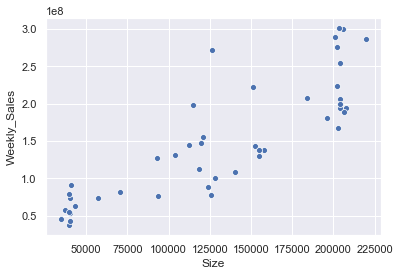

In [20]:
sns.scatterplot(x='Size', y='Weekly_Sales', 
                data=df.groupby(['Store', 'Size']).sum().reset_index())

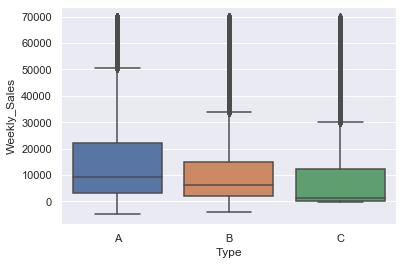

In [21]:
sns.boxplot(x='Type', y='Weekly_Sales', data=train[train.Weekly_Sales < 70000])

In [22]:
p80 = df[df.Type == 'A'].groupby(['Store']).sum()['Weekly_Sales'].quantile(0.8)

B = df[df.Type == 'B'].groupby(['Store']).sum().reset_index()
B[B.Weekly_Sales > p80]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
4,10,454210,2.716177e+08,724.0,744204.88,36850.231,35467714.88,15189969.53,11403792.73,15865865.26,19748423.7,1.327171e+06,86346.917,1304971280,265988,66435,20743031


In [23]:
stores_total = df.groupby(['Store']).sum().reset_index()

p20 = stores_total.Weekly_Sales.quantile(.2)
p40 = stores_total.Weekly_Sales.quantile(.4)
p60 = stores_total.Weekly_Sales.quantile(.6)
p80 = stores_total.Weekly_Sales.quantile(.8)

stores_total['Total_Sales_Store_Type'] = 1
stores_total.loc[stores_total.Weekly_Sales >= p20, 'Total_Sales_Store_Type'] = 2
stores_total.loc[stores_total.Weekly_Sales >= p40, 'Total_Sales_Store_Type'] = 3
stores_total.loc[stores_total.Weekly_Sales >= p60, 'Total_Sales_Store_Type'] = 4
stores_total.loc[stores_total.Weekly_Sales >= p80, 'Total_Sales_Store_Type'] = 5

stores_total.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year,Total_Sales_Store_Type
0,1,454749,2.224028e+08,723.0,698891.40,32973.495,2.957317e+07,8946002.16,4468507.74,13732804.50,1.838647e+07,2.212658e+06,77966.246,1550070860,264713,66107,20600316,5
1,2,455425,2.753824e+08,722.0,697263.44,32965.318,3.905801e+07,16088974.79,6226127.85,17427365.75,2.398463e+07,2.207844e+06,78047.128,2071219066,264151,65969,20588271,5
2,3,370825,5.758674e+07,633.0,644254.39,29087.899,9.983369e+06,2659078.45,2607992.20,2870236.34,4.116018e+06,1.982524e+06,64838.742,337874112,233500,58305,18171084,1
3,4,457340,2.995440e+08,727.0,638680.78,33037.189,3.444027e+07,14186418.01,7054847.27,18897288.62,2.504427e+07,1.321802e+06,61281.203,2114624736,264966,66176,20656634,5
4,5,371526,4.547569e+07,640.0,622763.37,28984.988,9.711212e+06,2701165.39,2116352.74,3555011.57,8.236391e+06,1.948972e+06,56662.647,313840125,232318,58011,18096690,1


In [24]:
print(f'Stores type 1: {len(stores_total[stores_total.Total_Sales_Store_Type == 1])}')
print(f'Stores type 2: {len(stores_total[stores_total.Total_Sales_Store_Type == 2])}')
print(f'Stores type 3: {len(stores_total[stores_total.Total_Sales_Store_Type == 3])}')
print(f'Stores type 4: {len(stores_total[stores_total.Total_Sales_Store_Type == 4])}')
print(f'Stores type 5: {len(stores_total[stores_total.Total_Sales_Store_Type == 5])}')

Stores type 1: 9
Stores type 2: 9
Stores type 3: 9
Stores type 4: 9
Stores type 5: 9


### Analyze `Is_Holiday`
- How many holidays’ weeks are in the train set; test set? (two integer numbers, divided by comma)
- Separate 3 important American holidays: Super Bowl; Black Friday; Christmas:
    - Generate 5 separate attributes (nominal True-False or 1-0): `Is_SuperBowl`, `Is_BlackFriday`, `Is_Christmas`, `Other_holidays` and `Regular_weeks` (`Other_holidays` are all weeks which are not SuperBowl or BlackFriday or Christmas but have `Is_Holiday` = True; `Regular_weeks` are weeks which are not SuperBowl or BlackFriday or Christmas and `Is_Holiday` = False). How many `Other_holidays` weeks do you have in the whole training set? Dates will slightly differ from year to year, use the following google search pattern: us holiday_name year dates, e.g. us super bowl 2011 dates. You could share these dates with your colleagues.
    - Select 10 Stores with highest total Sales in 2011. Compute the percentage of Sales during Black Friday week compared to total Sales; during Super Bowl week; during Christmas week. (three integer numbers 0-100, e.g. 10,20,30)
    - Select 10 Stores with lowest total Sales in 2011. Compute the percentage of Sales during Black Friday week compared to total Sales; during Super Bowl week; during Christmas week. (three integer numbers 0-100, e.g. 10,20,30)

In [25]:
train_dates = train[['Week', 'Year', 'IsHoliday']].drop_duplicates()
test_dates = test[['Week', 'Year', 'IsHoliday']].drop_duplicates()
print(f'Train set holidays: {len(train_dates[train_dates.IsHoliday])}')
print(f'Test set holidays: {len(test_dates[test_dates.IsHoliday])}')

Train set holidays: 8
Test set holidays: 2


In [26]:
super_bowl = pd.to_datetime(['2010-02-12T00:00:00', '2011-02-11 00:00:00', \
                             '2012-02-10 00:00:00', '2013-02-08 00:00:00'], errors='coerce')
black_friday = pd.to_datetime(['2010-11-26 00:00:00', '2011-11-25 00:00:00', \
                               '2012-11-23 00:00:00', '2013-11-29 00:00:00'], errors='coerce')
christmas = pd.to_datetime(['2010-12-31 00:00:00', '2011-12-30 00:00:00', \
                            '2012-12-28 00:00:00', '2013-12-27 00:00:00'], errors='coerce')

In [27]:
train['Regular_Weeks'] = True
train['Other_Holidays'] = False
train['Is_SuperBowl'] = False
train['Is_BlackFriday'] = False
train['Is_Christmas'] = False

train.loc[train.IsHoliday, 'Regular_Weeks'] = False
train.loc[train.Date.isin(super_bowl), 'Is_SuperBowl'] = True
train.loc[train.Date.isin(black_friday), 'Is_BlackFriday'] = True
train.loc[train.Date.isin(christmas), 'Is_Christmas'] = True
train.loc[train.IsHoliday \
          & (train.Date.isin(super_bowl) == False) \
          & (train.Date.isin(black_friday) == False)
          & (train.Date.isin(christmas) == False), 'Other_Holidays'] = True

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Week,Month,Year,Regular_Weeks,Other_Holidays,Is_SuperBowl,Is_BlackFriday,Is_Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,True,False,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,True,False,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,True,False,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,True,False,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,True,False,False,False,False


In [28]:
oh = train[train.Other_Holidays]
print(f'Other holidays: {len(oh.groupby(["Date"]))}')

Other holidays: 2


In [29]:
w_sales_2011 = train[train.Year == 2011]

bf_sales = w_sales_2011[w_sales_2011.Is_BlackFriday]
sb_sales = w_sales_2011[w_sales_2011.Is_SuperBowl]
ch_sales = w_sales_2011[w_sales_2011.Is_Christmas]

In [30]:
sales_2011 = w_sales_2011.groupby(['Store']).agg(Sales=('Weekly_Sales', 'sum')).reset_index()
bf_sales = bf_sales.groupby(['Store']).agg(Sales=('Weekly_Sales', 'sum')).reset_index()
sb_sales = sb_sales.groupby(['Store']).agg(Sales=('Weekly_Sales', 'sum')).reset_index()
ch_sales = ch_sales.groupby(['Store']).agg(Sales=('Weekly_Sales', 'sum')).reset_index()

sales_2011 = sales_2011.merge(bf_sales, on=['Store'], suffixes=['', '_BF'])
sales_2011 = sales_2011.merge(sb_sales, on=['Store'], suffixes=['', '_SB'])
sales_2011 = sales_2011.merge(ch_sales, on=['Store'], suffixes=['', '_CH'])

sales_2011.head()

,Store,Sales,Sales_BF,Sales_SB,Sales_CH
0,1,8.092192e+07,2033320.66,1649614.93,1497462.72
1,2,9.860788e+07,2614202.30,2168041.61,1874226.52
2,3,2.081688e+07,556925.19,430526.21,410553.88
3,4,1.110923e+08,3004702.33,2187847.29,2007105.86
4,5,1.647082e+07,507900.07,311590.54,349624.88


In [31]:
top_10_sales_2011 = sales_2011.sort_values(['Sales'], ascending=False).head(10)

print(f'Sales during BlackFriday: {top_10_sales_2011.Sales_BF.sum() * 100 / top_10_sales_2011.Sales.sum():.2f}%')
print(f'Sales during SuperBowl: {top_10_sales_2011.Sales_SB.sum() * 100 / top_10_sales_2011.Sales.sum():.2f}%')
print(f'Sales during Christmas: {top_10_sales_2011.Sales_CH.sum() * 100 / top_10_sales_2011.Sales.sum():.2f}%')

Sales during BlackFriday: 2.73%
Sales during SuperBowl: 1.94%
Sales during Christmas: 1.88%


In [32]:
low_10_sales_2011 = sales_2011.sort_values(['Sales']).head(10)

print(f'Sales during BlackFriday: {low_10_sales_2011.Sales_BF.sum() * 100 / low_10_sales_2011.Sales.sum():.2f}%')
print(f'Sales during SuperBowl: {low_10_sales_2011.Sales_SB.sum() * 100 / low_10_sales_2011.Sales.sum():.2f}%')
print(f'Sales during Christmas: {low_10_sales_2011.Sales_CH.sum() * 100 / low_10_sales_2011.Sales.sum():.2f}%')

Sales during BlackFriday: 2.37%
Sales during SuperBowl: 1.97%
Sales during Christmas: 1.87%


### Analyze `Temperature`:
- Plot a linear graph of temperature over time (averaged over all stores). 
- Plot a scatter plot of `Temperature` vs `Weekly_Sales` (every point corresponds to a single date, a single store).  Compute correlation between them.  (single number rounded to 3 decimal places, e.g. 0.001)
- Find 2 stores with the biggest difference in temperature in July 2010. (two stores ID, e.g. 1, 2)
- Plot a linear graph of temperature over time for these two stores, use different colors for different stores. 
- Plot a scatter plot of `Temperature` vs `Weekly_Sales`, use different colors for points corresponding to different stores. Compute correlation between temperature and sales separately for each of 2 stores.  (two numbers rounded to 3 decimal places, e.g. 0.001, 0.002) Do they differ from each other? Do they differ from I.4.b? 
- Generate new attribute `Average_Temperature_month`: average temperature over current month for this particular store.  You may use any reasonable approach: e.g. for the current week average of the last 4 weeks, or average of all weeks from the same month one year ago.

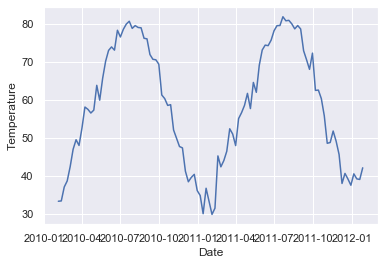

In [33]:
sns.lineplot(x='Date', y='Temperature', data=train.groupby(['Date']).mean().reset_index())

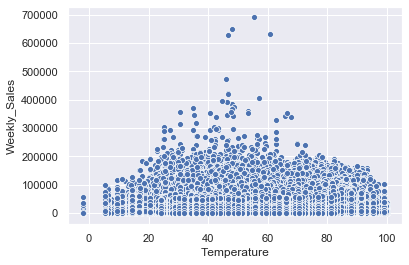

In [34]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train)

In [35]:
train[['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.004257
Temperature,-0.004257,1.000000


In [36]:
july_2010 = train[(train.Month == 7) & (train.Year == 2010)]
july_2010 = july_2010.groupby(['Store']).agg(min_temp=('Temperature', 'min'), \
                                             max_temp=('Temperature', 'max')) \
                                        .reset_index()

july_2010['delta_temp'] = july_2010.max_temp - july_2010.min_temp
july_2010.sort_values(['delta_temp'], ascending=False).head(2)

,Store,min_temp,max_temp,delta_temp
22,23,64.76,77.16,12.40
25,26,58.90,71.08,12.18


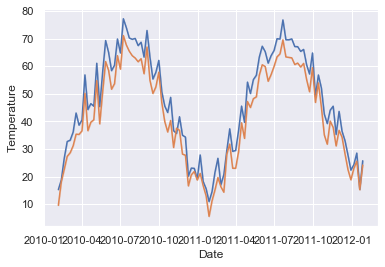

In [37]:
sns.lineplot(x='Date', y='Temperature', data=train[train.Store == 23])
sns.lineplot(x='Date', y='Temperature', data=train[train.Store == 26])

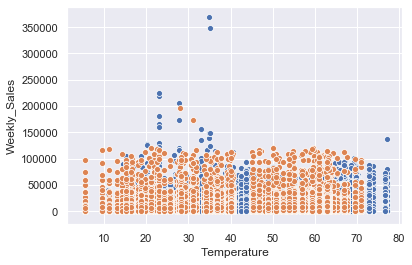

In [38]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train[train.Store == 23])
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train[train.Store == 26])

In [39]:
train[train.Store == 23][['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.000441
Temperature,-0.000441,1.000000


In [40]:
train[train.Store == 26][['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,0.015709
Temperature,0.015709,1.000000


In [41]:
atm = train.groupby(['Store', 'Month', 'Year']).agg(Average_Temperature_Month=('Temperature', 'mean')).reset_index()
atm.head()

,Store,Month,Year,Average_Temperature_Month
0,1,1,2011,42.907867
1,1,1,2012,51.477552
2,1,2,2010,41.840000
3,1,2,2011,49.755993
4,1,3,2010,52.577000


In [42]:
train = train.merge(atm, on=['Store', 'Month', 'Year'])

### Drop `Fuel_Price`, `MarkDown1`, `MarkDown2`, `MarkDown3`, `MarkDown4`, `MarkDown5`, `CPI`, `Unemployment`, `Temperature` as they only appears for the downloaded train table (they are not available for the “future”); Drop `Is_Holiday` and `Type` attribute;

In [43]:
train = train.drop(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature', \
                    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
test = test.drop(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature', \
                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

### Generate `sample_weights` attribute and set the roles for `sample_weights` (weight) and `Weekly_Sales` (label);
You might use so-called “lag” features: e.g. to predict Sales on January, 2014 use `Unemployment` for the last available period (July 2013). But you should do it with extreme caution.

In [44]:
train['sample_weights'] = train.Regular_Weeks.apply(lambda rw: 1 if rw else 5)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Week,Month,Year,Regular_Weeks,Other_Holidays,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Average_Temperature_Month,sample_weights
0,1,1,2010-02-05,24924.50,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
1,1,2,2010-02-05,50605.27,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
2,1,3,2010-02-05,13740.12,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
3,1,4,2010-02-05,39954.04,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
4,1,5,2010-02-05,32229.38,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
